<a href="https://colab.research.google.com/github/julianadslopes/julianadslopes-Airbnb_Data_Analysis_Dublin/blob/main/Analisando_os_Dados_do_Airbnb_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Dublin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/ireland/leinster/dublin/2022-09-11/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* ***id***  - número gerado para identificar anúncio
* ***name*** - nome do anúncio
* ***host_id*** - numero identificação
* ***host_name*** - nome do anfitrião
* ***neighbourhood_group*** - coluna sem valor válido
* ***neighbourhood*** - bairro
* ***latitude*** - coordenada da latitude da propriedade
* ***longitude*** - coordenada da longitude da propriedade
* ***room_type*** - tipo da propriedade
* ***price*** - preço do aluguel diário da propriedade
* ***minimum_nights*** - quantidade mínima permitida de noites para reservar
* ***number_of_reviews*** - número de avaliações do anúncio
* ***last_review*** - data da última avaliação
* ***reviews_per_month*** - quantidade de avaliações por mês
* ***calculated_host_listings_count*** - quantidade de imóveis do mesmo anfitrião
* ***availability_365*** - número de dias de disponibilidade dentre 365 dias
* ***number_of_reviews_ltm*** - número de avaliações nos últimos 12 meses
* ***license*** - coluna sem valor válido

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,70,3,258,2022-09-09,1.85,2,104,31,NaN
1,178860,Georgian House in Heart of City Ctr,856312,Danielle,NaN,Dublin City,53.33281,-6.26750,Private room,80,2,313,2021-08-19,2.57,2,0,0,NaN
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,67,3,210,2022-09-11,1.53,2,110,28,NaN
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,45,2,355,2022-09-01,2.78,3,290,44,NaN
4,181823,Comfy room 5k from Croke Park - near beach/town.,608225,Norah,NaN,Dublin City,53.33740,-6.22061,Private room,139,1,50,2019-05-16,0.37,2,2,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame

print('Entradas:{}'.format(df.shape[0]))
print('Variáveis:{}'.format(df.shape[1]))


Entradas:7566
Variáveis:18


In [5]:
# verificar as 5 primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,70,3,258,2022-09-09,1.85,2,104,31,NaN
1,178860,Georgian House in Heart of City Ctr,856312,Danielle,NaN,Dublin City,53.33281,-6.26750,Private room,80,2,313,2021-08-19,2.57,2,0,0,NaN
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,67,3,210,2022-09-11,1.53,2,110,28,NaN
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,45,2,355,2022-09-01,2.78,3,290,44,NaN
4,181823,Comfy room 5k from Croke Park - near beach/town.,608225,Norah,NaN,Dublin City,53.33740,-6.22061,Private room,139,1,50,2019-05-16,0.37,2,2,0,NaN


In [6]:
# Verificando os tipos das variáveis
df.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# Quantidade de valores ausentes
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7566
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1357
reviews_per_month                 1357
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           7566
dtype: int64

In [8]:
# Percentual de Valores ausentes
df.isnull().sum()/df.shape[0]

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.179355
reviews_per_month                 0.179355
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           1.000000
dtype: float64

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.179355
last_review                       0.179355
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

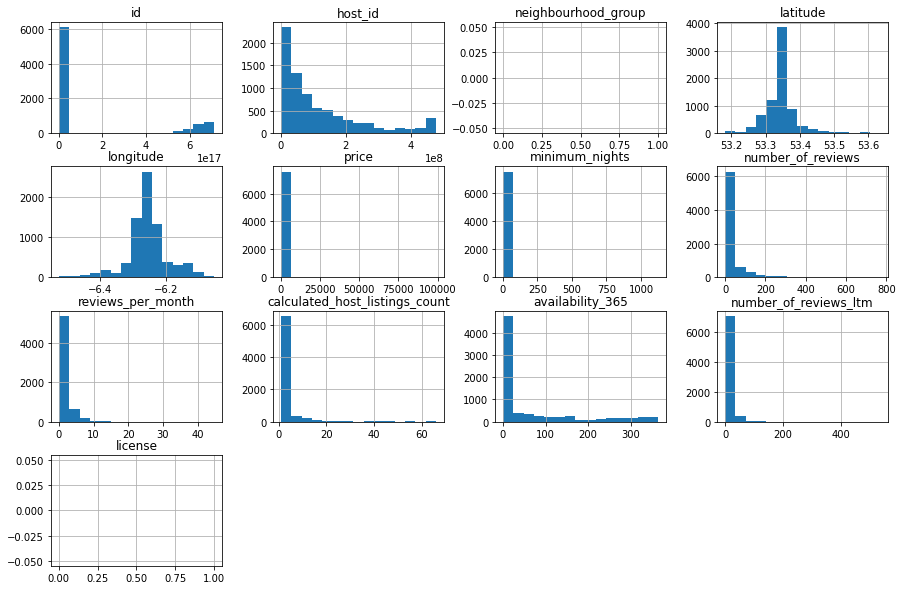

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [11]:
# Outliers presentes
# Resumo Estatístico
df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7566.000000,7566.000000,7566.000000,6209.000000,7566.000000,7566.000000,7566.000000
mean,182.327914,6.253899,32.141554,1.319006,4.160983,64.799630,7.417394
std,1170.750217,28.165241,65.581141,1.988691,9.654986,105.541663,19.736251
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,65.000000,1.000000,1.000000,0.130000,1.000000,0.000000,0.000000
50%,105.000000,2.000000,7.000000,0.610000,1.000000,0.000000,0.000000
75%,192.750000,4.000000,30.000000,1.760000,3.000000,91.000000,6.000000
max,99149.000000,1125.000000,770.000000,44.720000,66.000000,365.000000,536.000000


In [44]:
df.groupby("neighbourhood").price.max()

neighbourhood
Dn Laoghaire-Rathdown     2000
Dublin City               8956
Fingal                   99149
South Dublin              2571
Name: price, dtype: int64

In [53]:
df.loc[df['price']==99149]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6149,592358982465178083,Not available,342210497,Larisa,NaN,Fingal,53.4018,-6.40331,Private room,99149,2,8,2022-08-22,2.33,2,252,8,NaN


### **Q4. Qual a média dos preços de aluguel?**

In [12]:
# ver a média da coluna `price``
df.price.mean()

182.32791435368756

**Boxplot para price**



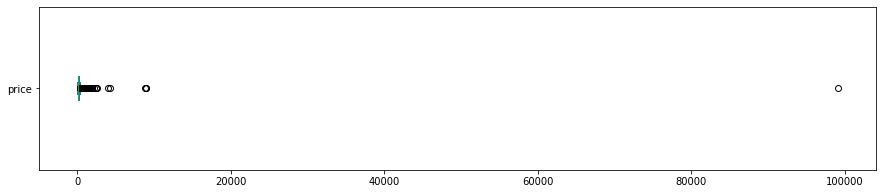

price: valores acima de 1500
79 entradas
1.0441%


In [15]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 1500 para price
print("price: valores acima de 1500")
print("{} entradas".format(len(df[df.price>1500])))
print("{:.4f}%".format((len(df[df.price>1500])/ df.shape[0])*100))

In [16]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

6.253899021940259

**Boxplot para minimum nights**


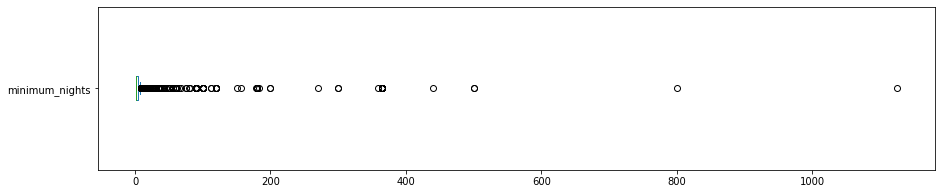

mínimo de noites: valores acima de 90
52 entradas
0.6873%


In [17]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 90 noites (3 meses)
print("mínimo de noites: valores acima de 90")
print("{} entradas".format(len(df[df.minimum_nights > 90])))
print("{:.4f}%".format((len(df[df.minimum_nights > 90])/ df.shape[0])*100))

**Histograma sem Outliers**


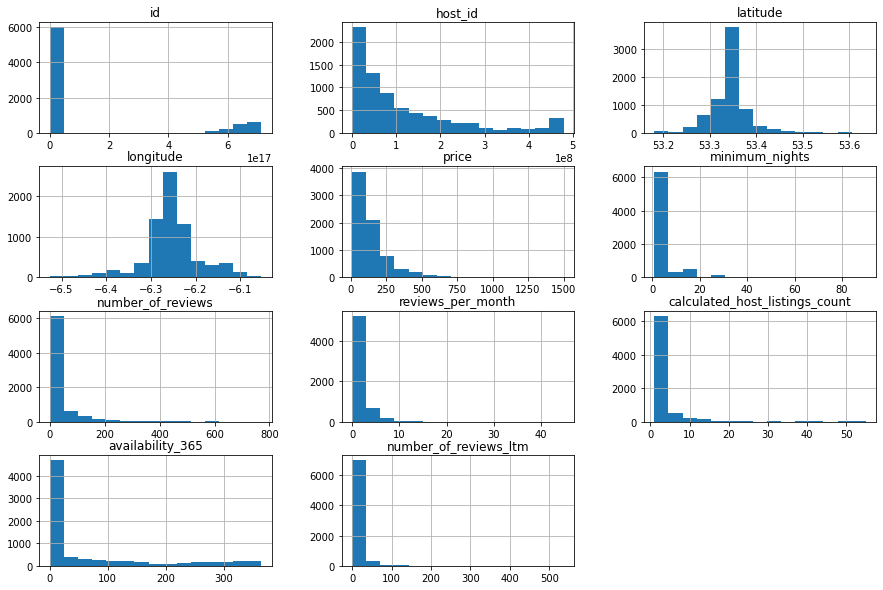

In [18]:
# tirando os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>90].index, axis=0, inplace=True)

# tirando as colunas vazias
df_clean.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

# Plotando o Histograma atualizado
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

In [19]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.040696,-0.018855,0.049071,0.088839,0.235242,0.052640
minimum_nights,0.040696,1.000000,-0.023574,-0.083917,0.213118,0.124540,-0.076091
number_of_reviews,-0.018855,-0.023574,1.000000,0.476837,0.010348,0.112710,0.589375
reviews_per_month,0.049071,-0.083917,0.476837,1.000000,0.025051,0.270043,0.702598
calculated_host_listings_count,0.088839,0.213118,0.010348,0.025051,1.000000,0.178549,0.029542
availability_365,0.235242,0.124540,0.112710,0.270043,0.178549,1.000000,0.255366
number_of_reviews_ltm,0.052640,-0.076091,0.589375,0.702598,0.029542,0.255366,1.000000


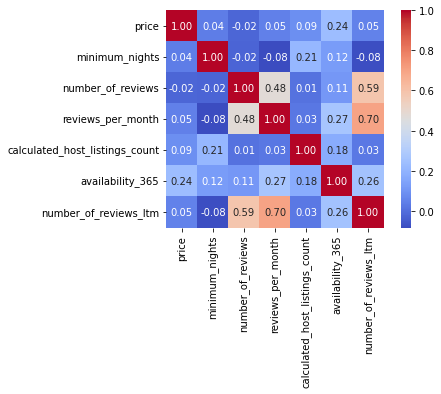

In [20]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='coolwarm',fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [21]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    3758
Private room       3463
Shared room         173
Hotel room           42
Name: room_type, dtype: int64

In [22]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.505379
Private room       0.465707
Shared room        0.023265
Hotel room         0.005648
Name: room_type, dtype: float64

In [23]:
# Valor máximo por bairro
df_clean.groupby(['neighbourhood']).price.max().sort_values(ascending=False)

neighbourhood
Dublin City              1500
Dn Laoghaire-Rathdown    1495
Fingal                   1277
South Dublin              900
Name: price, dtype: int64

In [24]:
#Valor mínimo por bairro
df_clean.groupby(['neighbourhood']).price.min().sort_values()

neighbourhood
Dublin City              10
Dn Laoghaire-Rathdown    15
Fingal                   15
South Dublin             15
Name: price, dtype: int64

### **Q7. Qual a localidade mais cara do dataset?**



In [25]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Dublin City              155.715596
Dn Laoghaire-Rathdown    148.032115
Fingal                   132.579652
South Dublin             105.708333
Name: price, dtype: float64

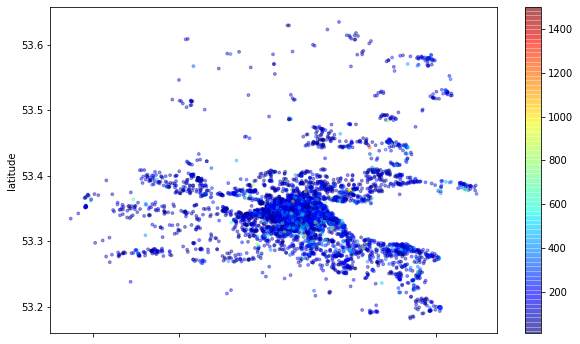

In [26]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(10,6));

In [42]:
# Quantidade de propriedade por Região
df_clean.neighbourhood.value_counts(ascending=False)

Dublin City              5450
Dn Laoghaire-Rathdown     903
Fingal                    747
South Dublin              336
Name: neighbourhood, dtype: int64

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [27]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

6.253899021940259

## Conclusões


#### Analisamos 7556 dados de entrada distribuídos em 18 variáveis. Nessa análise pudemos chegar às seguintes conclusões:
---
* Observamos que existem valores ausentes no dataset. Nas variáveis 'license' e 'neighbourhood_group' temos 100% dos **valores ausentes**, e aproximadamente 17,94% nas variáveis 'reviews_per_month' e 'last_reviews'. Enquanto isso, as demais variáveis possuem 100% dos **valores presentes**.
*  Existem outliers nas variáveis 'price' e 'minimum_nights'. Na variável 'price', observamos que o valor máximo é de 99149, muito distante da **média** calculada de **182,33**. Este outlier se refere a um quarto privado localizado na região de Fingal.
*   **50,5% dos anúncios são de casas ou apartamentos inteiros**. 46,5% de quartos privados e um pouco mais de 2% de quartos compartilhados. O número de quartos de hotel não chega nem a 1% dos valores observados. 
* Observamos ainda que a região de **Dublin City é onde se concentra a grande maioria das propriedades.** A quantidade de propriedades nela é quase 3 vezes o valor da soma das demais localidades.
* Após retirarmos os outliers, **constatamos que Dublin City possui a média do aluguel de 155,71**, a maior dentre as regiões. Curiosamente, também é a região onde possui o menor valor de aluguel: 10.



